# changing_inputs

This Notebook loads an input file, changes the inputs and for each change runs the sap2012 model.

## Setup

In [1]:
%matplotlib inline
from sap2012 import calculate_worksheet
import matplotlib.pyplot as plt
import json

## Read input file

In [2]:
with open ('inputs.json','r') as f:
    inputs=json.load(f)

## Change input and run model

The original `temperature_during_heating_living_room` input value is:

In [3]:
inputs['utilisation_factor_for_heating_table_9a']['temperature_during_heating_living_room']

20

Here this is changed to the five possible options below:

In [4]:
temperature_during_heating_living_room=[19,20,21,22,23]

For each temperature, the SAP model is run and the results stored in the `outputs` dictionary:

In [5]:
outputs={}
for i,new_temperature in enumerate(temperature_during_heating_living_room):
    inputs['utilisation_factor_for_heating_table_9a']['temperature_during_heating_living_room']=new_temperature
    result=calculate_worksheet(inputs)
    outputs['run%s' % str(i+1)]=result

## Plot results

In [6]:
total_energy_used=[v['energy_requirements']['total_energy_used'] for v in outputs.values()]
total_energy_used

[15260.99779475192,
 16934.13860137624,
 18632.54670247492,
 20353.28071370914,
 22091.632938408216]

Text(0, 0.5, 'Total energy used (kWh/year)')

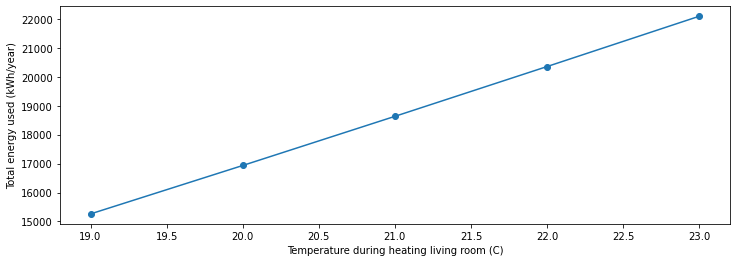

In [7]:
fig, ax = plt.subplots(figsize=(12,4))  
ax.plot(temperature_during_heating_living_room, total_energy_used,'-o')
ax.set_xlabel('Temperature during heating living room (C)')
ax.set_ylabel('Total energy used (kWh/year)')